## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [3]:
data = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"
!wget $data -O bank_marketing.zip

--2025-09-05 10:56:07--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank_marketing.zip’

bank_marketing.zip      [       <=>          ] 999.85K   687KB/s    in 1.5s    

2025-09-05 10:56:10 (687 KB/s) - ‘bank_marketing.zip’ saved [1023843]



In [ ]:
!unzip bank_marketing.zip -d deposits 

Archive:  bank_marketing.zip
replace deposits/bank.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
n

In [ ]:
!unzip bank.zip -d bank

## Data prep

In [76]:
path = "./deposits/bank/bank-full.csv"
df = pd.read_csv(path, sep =';') 

In [77]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [78]:
del df['default']
del df['loan']

In [79]:
df.isnull().any()

age          False
job          False
marital      False
education    False
balance      False
housing      False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [80]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [81]:
cols = [x for x in df.columns.tolist() if x not in cat_cols]

In [82]:
cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [83]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [84]:
from sklearn.model_selection import train_test_split 

## Target encoding 
df['y'] = df['y'].map({'yes': 1, 'no': 0})

df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.2, random_state = 1)

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train = df_full_train.y.values 
y_train = df_train.y.values 
y_val = df_val.y.values 
y_test = df_test.y.values 

#del df_full_train['y']
#del df_train['y']
#del df_val['y']
#del df_test['y']

In [85]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


## Questionnaire

In [9]:
from sklearn.metrics import roc_auc_score

df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,management,married,tertiary,1755,yes,unknown,21,may,588,2,-1,0,unknown
1,48,blue-collar,married,unknown,434,no,cellular,18,aug,73,6,-1,0,unknown
2,72,retired,married,primary,2079,no,cellular,13,aug,100,1,191,3,other
3,53,technician,married,secondary,598,no,cellular,2,feb,340,3,264,2,failure
4,44,admin.,married,secondary,764,yes,cellular,3,sep,232,1,213,1,failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28929,32,technician,single,tertiary,195,yes,cellular,22,aug,239,2,-1,0,unknown
28930,52,self-employed,married,secondary,3720,no,cellular,20,nov,114,2,-1,0,unknown
28931,52,blue-collar,married,secondary,289,yes,unknown,21,may,45,13,-1,0,unknown
28932,32,management,married,tertiary,312,no,cellular,11,aug,67,4,-1,0,unknown


In [10]:
df_train.select_dtypes(include = 'number').columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [11]:
y_train

array([0, 0, 0, ..., 0, 0, 0], shape=(28934,))

In [12]:
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
my_dict = {}
for i in num_cols:
    my_dict[i] = roc_auc_score(y_train, df_train[i])

In [13]:
my_dict #duration has the maximum AUC. 

{'age': 0.4906440373132043,
 'balance': 0.5899473804882456,
 'day': 0.4733027703121186,
 'duration': 0.8142915057456301,
 'campaign': 0.4290518510451203,
 'pdays': 0.5907520267644112,
 'previous': 0.5993297719838377}

## Training 

In [14]:
df_train.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [15]:
cat_cols = df_train.select_dtypes(include = 'object').columns

In [16]:
cat_cols

Index(['job', 'marital', 'education', 'housing', 'contact', 'month',
       'poutcome'],
      dtype='object')

In [17]:
from sklearn.feature_extraction import DictVectorizer 

dv = DictVectorizer(sparse = False)
train_dicts = df_train[cat_cols].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dicts)

In [18]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
lr.coef_

array([[ 0.34350176,  0.09369187, -0.95203188, -0.31070032, -0.14901908,
        -0.01078505, -0.04433381, -0.00904709, -0.50579116, -0.11236694,
        -0.18365917, -0.19457403, -0.22500081, -0.06294967,  0.43302723,
        -0.03926545, -0.1054998 ,  0.31223461, -0.1825073 ,  0.13159821,
        -0.28587514, -0.15846944, -0.32804609, -0.02832272,  0.05595549,
        -0.85847322,  0.54701076, -0.46136874, -1.0697817 , -0.72795039,
         0.24331791,  1.26239632, -0.43539889, -0.77318535,  0.96302428,
         0.73961528, -0.76052103, -0.55773829,  1.53847127, -0.73505021]])

In [20]:
val_dicts = df_val[cat_cols].to_dict(orient = 'records')
#dv = DictVectorizer(sparse = False)
X_val = dv.fit_transform(val_dicts) 



In [21]:
y_pred = lr.predict_proba(X_val)[:,1]

In [22]:
y_pred

array([0.06937611, 0.06675402, 0.03750091, ..., 0.31000609, 0.06930056,
       0.56092208], shape=(7234,))

In [23]:
roc_auc_score(y_val, y_pred)  #0.79 is the answer 

0.7681056018525498

In [24]:
### precision and Recall

In [25]:
thresholds = np.linspace(0.0, 1.0, 101)
scores = []
for i in thresholds:
    pos = (y_val == 1)
    neg = (y_val == 0)
    pred_pos = (y_pred >= i)
    pred_neg = (y_pred < i )

    tp = (pos & pred_pos).sum()
    tn = (neg & pred_neg).sum()
    fp = (neg & pred_pos).sum()
    fn = (pos & pred_neg).sum()

    scores.append((i, tp, tn, fp, fn))
    

In [26]:
scores

[(np.float64(0.0), np.int64(913), np.int64(0), np.int64(6321), np.int64(0)),
 (np.float64(0.01), np.int64(913), np.int64(0), np.int64(6321), np.int64(0)),
 (np.float64(0.02), np.int64(910), np.int64(136), np.int64(6185), np.int64(3)),
 (np.float64(0.03),
  np.int64(885),
  np.int64(877),
  np.int64(5444),
  np.int64(28)),
 (np.float64(0.04),
  np.int64(866),
  np.int64(1244),
  np.int64(5077),
  np.int64(47)),
 (np.float64(0.05),
  np.int64(860),
  np.int64(1574),
  np.int64(4747),
  np.int64(53)),
 (np.float64(0.06),
  np.int64(821),
  np.int64(2029),
  np.int64(4292),
  np.int64(92)),
 (np.float64(0.07),
  np.int64(790),
  np.int64(2622),
  np.int64(3699),
  np.int64(123)),
 (np.float64(0.08),
  np.int64(752),
  np.int64(3247),
  np.int64(3074),
  np.int64(161)),
 (np.float64(0.09),
  np.int64(700),
  np.int64(3770),
  np.int64(2551),
  np.int64(213)),
 (np.float64(0.1),
  np.int64(645),
  np.int64(4301),
  np.int64(2020),
  np.int64(268)),
 (np.float64(0.11),
  np.int64(598),
  np.i

In [27]:
columns1 = ['thresholds', 'tp', 'tn', 'fp', 'fn']
df_scores = pd.DataFrame(scores, columns = columns1)

In [28]:
type(df_scores)

pandas.core.frame.DataFrame

In [29]:
print(scores[:3])

[(np.float64(0.0), np.int64(913), np.int64(0), np.int64(6321), np.int64(0)), (np.float64(0.01), np.int64(913), np.int64(0), np.int64(6321), np.int64(0)), (np.float64(0.02), np.int64(910), np.int64(136), np.int64(6185), np.int64(3))]


In [30]:
df_scores.head(5)

,thresholds,tp,tn,fp,fn
0,0.00,913,0,6321,0
1,0.01,913,0,6321,0
2,0.02,910,136,6185,3
3,0.03,885,877,5444,28
4,0.04,866,1244,5077,47


In [31]:
df_scores['recall'] = df_scores['tp']/(df_scores['tp'] + df_scores['fn'])

In [32]:
df_scores['precision'] = df_scores['tp']/(df_scores['tp'] + df_scores['fp'])

In [33]:
df_scores

,thresholds,tp,tn,fp,fn,recall,precision
0,0.00,913,0,6321,0,1.000000,0.126210
1,0.01,913,0,6321,0,1.000000,0.126210
2,0.02,910,136,6185,3,0.996714,0.128259
3,0.03,885,877,5444,28,0.969332,0.139833
4,0.04,866,1244,5077,47,0.948521,0.145718
...,...,...,...,...,...,...,...
96,0.96,0,6321,0,913,0.000000,NaN
97,0.97,0,6321,0,913,0.000000,NaN
98,0.98,0,6321,0,913,0.000000,NaN
99,0.99,0,6321,0,913,0.000000,NaN


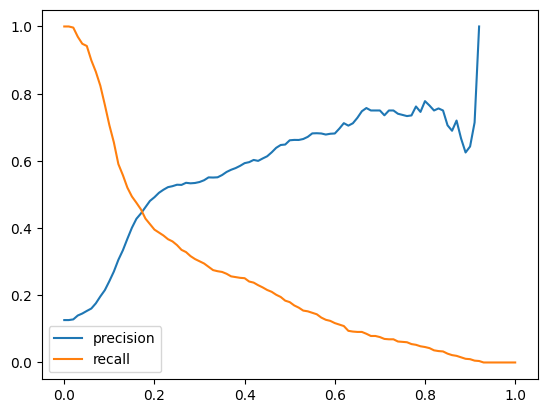

In [34]:
import matplotlib.pyplot as plt #0.465 is where they intersect 

plt.plot(df_scores.thresholds, df_scores.precision, label = 'precision')
plt.plot(df_scores.thresholds, df_scores.recall, label = 'recall')
plt.legend()

In [35]:
df_scores['F1_score'] = 2* df_scores['precision']*df_scores['recall']/(df_scores['precision'] + df_scores['recall'])

In [36]:
df_scores['F1_score'].max() #0.42 is the max 

np.float64(0.4502074688796681)

## Cross Validation

In [86]:
df_full_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,52,management,married,tertiary,0,no,cellular,22,aug,232,2,-1,0,unknown,0
1,50,admin.,single,secondary,330,yes,unknown,28,may,24,1,-1,0,unknown,0
2,45,blue-collar,married,primary,300,yes,cellular,29,jan,203,1,261,3,failure,0
3,38,technician,married,secondary,27,yes,unknown,3,jun,404,4,-1,0,unknown,0
4,31,services,single,secondary,887,no,cellular,30,jan,427,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,50,technician,married,tertiary,1830,no,cellular,14,may,318,3,-1,0,unknown,0
36164,34,management,divorced,tertiary,528,yes,cellular,17,apr,233,2,-1,0,unknown,0
36165,48,management,married,tertiary,4191,no,unknown,21,may,363,6,-1,0,unknown,0
36166,45,admin.,married,unknown,1783,no,unknown,20,jun,11,11,-1,0,unknown,0


In [87]:
#cat_cols = cat_cols.tolist()

In [88]:
cat_cols

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [89]:
cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [90]:
def train(df_train, y_train):
    dicts = df_train[cat_cols + cols].to_dict(orient = 'records')
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)
    lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    lr.fit(X_train, y_train)
    return dv, lr 

def predict(dv, lr, df):
    dicts = df[cat_cols + cols].to_dict(orient = 'records')
    X = dv.fit_transform(dicts)
    y = lr.predict_proba(X)[:,1]
    return y

from sklearn.model_selection import KFold 
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores_check = []
for train1, val1 in kfold.split(df_full_train):
    df_train_check = df_full_train.iloc[train1]
    df_val_check = df_full_train.iloc[val1]

    y_train_check = df_train_check.y.values 
    y_val_check = df_val_check.y.values 

    dv, lr = train(df_train_check, y_train_check)
    y_val_pred = predict(dv, lr, df_val_check)

    auc_score = roc_auc_score(y_val_check,y_val_pred)
    scores_check.append(auc_score)

    



    
    


    

In [91]:
print('%.3f +- %.3f' % (np.mean(scores_check), np.std(scores_check)))  # population standard deviation
print(std_dev)

1.000 +- 0.000
0.01572960166367468


## Parameter tuning

In [92]:
C = [0.000001, 0.001, 1]
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
for i in C:
    scores_check = []
    for train1, val1 in kfold.split(df_full_train):
        df_train_check = df_full_train.iloc[train1]
        df_val_check = df_full_train.iloc[val1]
    
        y_train_check = df_train_check.y.values 
        y_val_check = df_val_check.y.values 
    
        dv, lr = train(df_train_check, y_train_check)
        y_val_pred = predict(dv, lr, df_val_check)
    
        auc_score = roc_auc_score(y_val_check,y_val_pred)
        scores_check.append(auc_score)
    print('%.3f +- %.3f' % (np.mean(scores_check), np.std(scores_check)))

1.000 +- 0.000
1.000 +- 0.000
1.000 +- 0.000
